## 회귀분석 
- 회귀 분석은 실젯값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능평가 지표가 발전
- 실젯값과 예측값의 차이를 구해서 이것들을 단순히 합하게 되면 +와 -가 섞여 오류를 상쇄할 수 있다. 

### MAE
- 실젯값과 예측값의 차이를 절댓값으로 변환하여 평균한 것
- 에러의 크기가 그대로 반영
- 이상치에 영향을 받는다. 
### MSE
- 실젯값과 예측값의 차이를 제곱해 평균한 것
- 실젯값과 예측값 차이의 면적 합을 의미
- 특이값이 존재하면 수치가 증가
### RMSE
- 실젯값과 예측값의 차이를 제곱해 평균한 것에 루트
- 에러에 제곱을 하면 에러가 클수록 그에 따른 가중치가 높이 반영
- 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 더 커지는 것을 상쇄하기 위해 사용
### MSLE 
- 실젯값과 예측값의 차이를 제곱해 평균한 것에 로그를 적용한 것
- RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 더 커지는것을 상쇄하기 위해 사용
### MAPE
- MAE를 퍼센트로 표시
- 오차가 예측값에서 차지하는 정도를 나타냄

### 회귀분석의 순서
1. 데이터를 확인
2. 데이터를 분할
3. 데이터의 전처리
4. 모델 학습
5. 성능평가 및 예측값 저장

- 에러가 발생하시는 분들은 
- https://github.com/bsmoon-86/ubion-code
- boston.csv파일 다운

In [2]:
import pandas as pd

In [3]:
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM : 범죄율 (해당 지역 1인당 범죄 발생 수)

ZN : 25,000 평방피트 이상 주거지역 비율

INDUS : 비상업 지역(상업지구가 아닌) 토지 비율

CHAS : 찰스강 경계 여부 (1: 경계, 0: 비경계) → 더미 변수

NOX : 일산화질소 농도 (10ppm 단위)

RM : 주택 1가구당 평균 방 개수

AGE : 1940년 이전에 지어진 주택 비율

DIS : 직업 중심지(보스턴 5곳)까지의 가중 거리

RAD : 방사형 고속도로 접근성 지수

TAX : $10,000 당 재산세율

PTRATIO : 지역별 학생-교사 비율

B : 인종 지수 (1000(Bk - 0.63)^2, Bk=흑인 거주 비율)

LSTAT : 저소득층 비율 (%)

MEDV : 주택 가격의 중앙값 (단위: $1,000, 종속 변수)

In [4]:
## 데이터프레임의 확인
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
## 결측치 확인
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

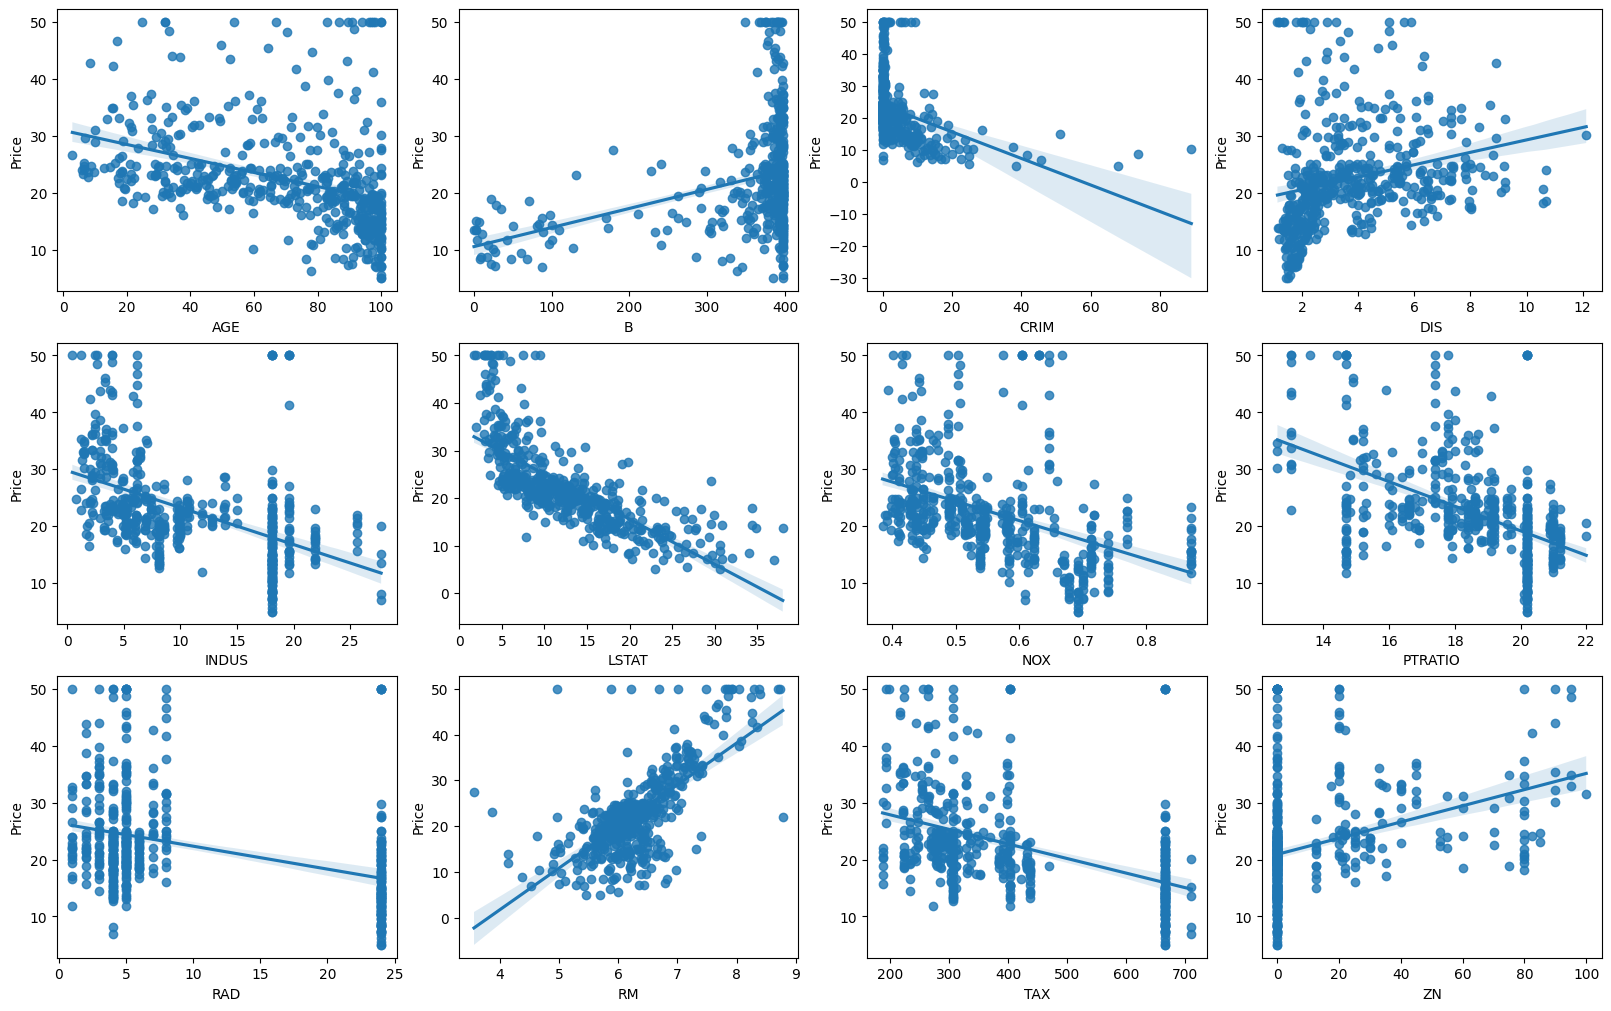

In [6]:
## 산점도와 선열 회귀 직선 시각화

import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 10), ncols=4, nrows=3, constrained_layout=True)

features = boston.columns.difference(['Price', 'CHAS'])

for i, feature in zip(range(12), features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = boston['Price'], data=boston, ax=axs[row][col])
plt.show()


In [7]:
## 데이터의 분할

from sklearn.model_selection import train_test_split

x = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values

y = boston['Price'].values

x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state = 42)

In [8]:
print("학습데이터 price 의 평균 :", y_train.mean())
print("평가데이터 price 의 평균 :", y_test.mean())

학습데이터 price 의 평균 : 22.796534653465343
평가데이터 price 의 평균 : 21.488235294117644


In [9]:
## 데이터 전처리 
## 비율, 농도, 개수 등 서로 다른 단위를 가진 연속형 자료
## Min-Max 방법으로 정규화 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)

In [10]:
## 모델 학습
## linearRegression(선형 회귀) 알고리즘 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_sc, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
import numpy as np

## predict() 로 학습데이터를 예측한 값에 저장
pred = linear.predict(x_train_sc)

mae = mean_absolute_error(y_train, pred)
mse = mean_squared_error(y_train, pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_train, pred)
mape = mean_absolute_percentage_error(y_train, pred)

## 결정계수 출력
r2 = r2_score(y_train, pred)

print("MAE :", round(mae, 5))
print("MSE :", round(mse, 5))
print("RMSE :", round(rmse, 5))
print("MSLE :", round(msle, 5))
print("MAPE :", round(mape * 100, 2))
print("R2 :", round(r2, 5))

TypeError: got an unexpected keyword argument 'squared'

In [12]:
## 성능 평가 및 예측값 저장
## x_test를 scaler.transform()에 입력하여 x_train과 같은 방식으로 Min-Max 정규화 수행
## x_test_sc를 훈련된 모델에 입력해 예측값을 pred_t 저장

x_test_sc = scaler.transform(x_test)
pred_t = linear.predict(x_test_sc)

In [13]:
mae = mean_absolute_error(y_test, pred_t)
mse = mean_squared_error(y_test, pred_t)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_t)

print("MAE :", round(mae, 5))
print("MSE :", round(mse, 5))
print("RMSE :", round(rmse, 5))
print("R2 :", round(r2, 5))

MAE : 3.23724
MSE : 24.63539
RMSE : 4.96341
R2 : 0.66406


In [14]:
pred_df = pd.DataFrame(pred_t, columns=["pred Price"])
actual = pd.DataFrame(y_test, columns=['actial Price'])


In [15]:
pred_df.head()

,pred Price
0,29.218660
1,33.551467
2,14.810658
3,25.084725
4,19.173927


In [16]:
actual.head()

,actial Price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1


In [17]:
## 두개의 데이터프레임을 결합 후 csv로 저장 
reg_result = pd.concat([actual, pred_df], axis=1)
reg_result.to_csv('reg_result.csv', index=False, encoding='utf-8')
reg_result.head()

,actial Price,pred Price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
3,22.8,25.084725
4,16.1,19.173927
